In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load data from files
with_tree_df = pd.read_excel("C:/Users/golna.GOLNAZ/Desktop/Result/Atmosphere/Potential Air T/X Potential Air Temperature.xlsx")
full_green_df = pd.read_excel("C:/Users/golna.GOLNAZ/Desktop/Result/Atmosphere/Potential Air T/Y Potential Air Temperature.xlsx")
no_greenery_df = pd.read_excel("C:/Users/golna.GOLNAZ/Desktop/Result/Atmosphere/Potential Air T/Z Potential Air Temperature.xlsx")

In [10]:
# Calculate median temperature for each time point across all locations
with_tree_median_temp_time = with_tree_df.drop(['Date', 'Time'], axis=1).median(axis=1)
full_green_median_temp_time = full_green_df.drop(['Date', 'Time'], axis=1).median(axis=1)
no_greenery_median_temp_time = no_greenery_df.drop(['Date', 'Time'], axis=1).median(axis=1)

# Extract unique sorted hours for plotting
time_points_hours = with_tree_df['Time'].str.slice(0, 2)
time_points = sorted(time_points_hours.unique())

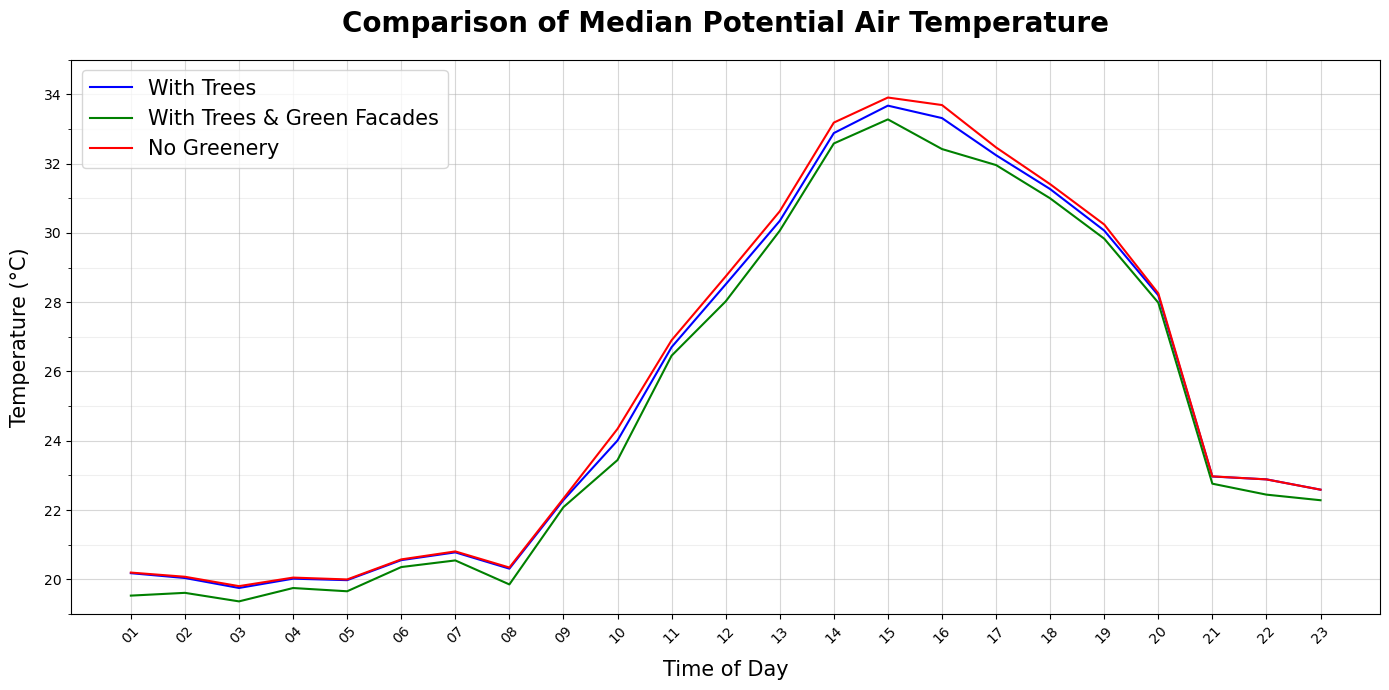

In [11]:
# Plot median temperatures
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(time_points, with_tree_median_temp_time, label='With Trees', color='blue')
ax.plot(time_points, full_green_median_temp_time, label='With Trees & Green Facades', color='green')
ax.plot(time_points, no_greenery_median_temp_time, label='No Greenery', color='red')

ax.set_title('Comparison of Median Potential Air Temperature', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Time of Day', fontsize=15, labelpad=10)
ax.set_ylabel('Temperature (°C)', fontsize=15, labelpad=10)

# Set y-axis ticks and grid
start_degree = 19
overall_max_temp = max(with_tree_median_temp_time.max(), full_green_median_temp_time.max(), no_greenery_median_temp_time.max())
major_ticks = range(20, int(overall_max_temp) + 2, 2)
minor_ticks = [19] + list(range(20, 35 + 1, 1))

ax.set_ylim(start_degree, overall_max_temp)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.xticks(rotation=45)
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('C:/Users/golna.GOLNAZ/Desktop/Result/Atmosphere/Potential Air T/Median_Air_Temperature_Comparison.png', dpi=600)
plt.show()

In [12]:

# Calculate absolute differences between scenarios at each time point
diff_with_tree_full_green = abs(with_tree_median_temp_time - full_green_median_temp_time)
diff_with_tree_no_greenery = abs(with_tree_median_temp_time - no_greenery_median_temp_time)
diff_full_green_no_greenery = abs(full_green_median_temp_time - no_greenery_median_temp_time)

# Sum these differences to get a total difference for each time point
total_diff = diff_with_tree_full_green + diff_with_tree_no_greenery + diff_full_green_no_greenery

# Find time point with maximum total difference
max_diff_index = total_diff.idxmax()
max_diff_time = time_points[max_diff_index]  # Corrected indexing

print(f"Maximum difference between the scenarios occurs at: {max_diff_time}")

Maximum difference between the scenarios occurs at: 16
